# Proyecto Claudia version 2


# User definitions

You can modify these parameters as needed


In [ ]:
# -------------------------------
# Physical parameters of the binary system
m1Mo           = 36                # Mass 1 (units of solar masses)
m2Mo           = 29                # Mass 2 (units of solar masses)
DMpc           = 420               # Distance (in Mpc)
iota           = 1.05              # Angle iota [-pi,pi] (in rad) - 60°==1.05



In [ ]:
# -------------------------------
# Parameters imposed by the detector characteristics

# Chirp minimum frequency
flow           = 20                # (Hz)

# Default resampling frequency
fs             = 16384             # Sampling frequency (Hz)

In [ ]:
# -------------------------------
# Post-Neutonian order
PNorder        = 1                 # (0,  1.0,  1.5,  2.0,  2.5,  3.0,  3.5)


In [ ]:
# -------------------------------
# Define path
Ruta            = "/content/drive/My Drive/Colab Notebooks/ToolboxPostNewtonian/"


In [ ]:
# -------------------------------
# For debugging
doprint        = True              # (False: no  | True: yes)
doplot         = True              # (False: no  | True: yes)


In [ ]:
# -------------------------------
# OTROS PARAMETROS QUE SE REQUIEREN ENTENDER

# -------------------------------
# Termination phase
phi_0         = 0


# Import libraries

In [ ]:
# -------------------------------
# Import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
#import scipy as sp
#import pandas as pd
#import seaborn as sns

# -------------------------------
# Mount your google drive in google colab
from google.colab import drive
drive.mount('/content/drive')

# -------------------------------
# Insert the directory
import sys
sys.path.insert(0,Ruta)

# -------------------------------
# Import custom made functions
import ToolboxPostNewtonian as PN


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#Funcion Gamma

from mpmath import *
mp.dps = 25; mp.pretty = True

"""
a=e1(2*9*j)
print(a)

b=expint(1, 6.25)
print(b)

xx = expint(1,2*1.83276898e+02*j)
print(xx)
"""

Thetat=np.array([0,0.3,0.3*j,0.3+0.3*j])
#yy=expint(1,data)
# esto genera error porque la funcion yy es punto por punto
#print(yy)

#resultado = np.empty(len(Thetat,))
resultado = []
resultadoRe = []
resultadoIm = []
print(resultado)
#print(resultado.shape)
for i in range(len(Thetat)):
  #resultado[i] = expint(3/5, Thetat[i])
  x = expint(3/5, Thetat[i])
  resultado.append(x)
  resultadoRe.append(x.real)
  resultadoIm.append(x.imag)
print(resultado)
print(resultadoRe)
print(resultadoIm)



[]
[+inf, 1.287198065841768725469657, (0.4233777210072592152717293 - 1.897425252632944364451287j), (0.6845861730655584795484352 - 0.7864553806853337078371397j)]
[+inf, 1.287198065841768725469657, 0.4233777210072592152717293, 0.6845861730655584795484352]
[0.0, 0.0, -1.897425252632944364451287, -0.7864553806853337078371397]


In [ ]:
x.real

0.6845861730655584795484352

In [ ]:
# Valores fijos para las constantes
c              = 2.99792458e8      # Velocity of light (m/s)
c2             = np.power(c,2)     # c^2
c3             = np.power(c,3)     # c^3
c4             = np.power(c,4)     # c^4
G              = 6.67430e-11       # Gravitational constant (m^3 kg^−1 s^−2)
CC             = 2.9e-62           # Cosmological constant (1/m^2)


# 1. Calculations

Compute information as $m_1$ and $m_2$ in MKS units, reduced mas $\mu$, symmetric mass ratio $\eta$, duration of the signal $T_{chirp}$, etc.

In [ ]:
# -------------------------------
# Compute all the information
D, m1, m2, Mtotal, mu, nu, Mchirp, fisco, Ncyc, Tchirp, Nsamples, \
t, t_coal, phi_coal = PN.GWphysicalinformation(DMpc, m1Mo, m2Mo, flow, fs, PNorder, doprint)


Distance:                        1.30e+25 m
Mass 1:                          7.16e+31 kg
Mass 2:                          5.77e+31 kg
Total mass:                      1.29e+32 kg
Reduced mass:                    3.19e+31 kg
Symmetric mass ratio:            0.25
Chirp mass:                      5.59e+31 kg
Frequency isco:                  67.65 Hz
Number of cycles:                23.50
Duration of the GW signal:       1.19 s
Number of samples in the signal: 19453


# 2. Compute $\Theta(t)$


In [ ]:
# -------------------------------
# Compute and plot $\Theta(t)$
Thetat = PN.GWtheta(nu, Mtotal, t_coal, t, False)

print(Thetat)

[1.83276898e+02 1.83267477e+02 1.83258055e+02 ... 2.82641399e-02
 1.88426163e-02 9.42109265e-03]


# Compute $I(\Theta)$

Recall that:

$I(\Theta):= \int \frac{1}{x^{13}}\mathrm{sin}(2\phi_{0\mathrm{PN}})dx$

And the solution is:

$\int \Theta^{-11/8}I(\Theta)d\Theta = -\frac{1}{375 \Theta^{3/4}} 4096 \nu^2
\\
\bigg[7 2^{3/5} \nu \bigg( \frac{- I \Theta^{5/8}}{\nu}\bigg)^{3/5} \Gamma(2/5, \frac{- 2 I \Theta^{5/8}}{\nu})
\\
+ 7 2^{3/5} \nu \bigg( \frac{I \Theta^{5/8}}{\nu}\bigg)^{3/5} \Gamma(2/5, \frac{ 2 I \Theta^{5/8}}{\nu})
\\
+ 20 2^{1/5} \nu \bigg( \frac{- I \Theta^{5/8}}{\nu}\bigg)^{6/5} \Gamma(4/5, \frac{- 2 I \Theta^{5/8}}{\nu})
\\
-20 2^{1/5} \nu \bigg( \frac{I \Theta^{5/8}}{\nu}\bigg)^{6/5} \Gamma(4/5, \frac{ 2 I \Theta^{5/8}}{\nu})
\\
+70 \Theta^{5/8} \sin(2 \Theta^{5/8}/ \nu) \bigg]
$

In [ ]:
# -------------------------------
# Compute I


\begin{eqnarray}
&& \int \Theta^{-11/8}I(\Theta)d\Theta = -\frac{8192\nu}{375}\Theta^{1/8}\left[ 35\nu\sin\left(\frac{2\Theta^{5/8}}{\nu}\right) \right.\nonumber\\
&& \left. + 20 \Theta^{5/8}\left(F_{\frac{1}{5}}\left(-\frac{2i\Theta^{5/8}}{\nu}\right) + F_{\frac{1}{5}}\left(\frac{2i\Theta^{5/8}}{\nu}\right)\right) \right.\nonumber\\
&& \left. + 7\nu\left(iF_{\frac{3}{5}}\left(\frac{2i\Theta^{5/8}}{\nu}\right) - iF_{\frac{3}{5}}\left(-\frac{2i\Theta^{5/8}}{\nu}\right)\right)\right]
\end{eqnarray}

$F_{n}(x):=x^{n-1}\Gamma(1-n,x)$

$\Gamma(1-n,x)=\int_{x}^{\infty}t^{-n}e^{-t}dt = E_n(z)$

donde $E_n(z)$ es mpmath.expint(*args)

# Compute $\phi(t)$

$\phi(t) = \phi_0-\frac{1}{\nu}\bigg[ \Theta^{5/8} \\
+\left( \frac{3715}{8064}+\frac{55}{96}\nu \right)\Theta^{3/8} \\
- \frac{800}{231}\frac{\Lambda G^2 m^2}{c^4}\Theta^{11/8}  \\
- \frac{5}{81}\frac{\Lambda G^2 m^2}{c^4}(1373+2204\nu)\Theta^{9/8}   \\
+ \frac{495}{4096}(1-3\nu)\frac{\Lambda G^2 m^2}{c^4}\int \Theta^{-11/8}I(\Theta)d\Theta \bigg]$



In [ ]:
from ast import Lambda
# -------------------------------
# Compute the phase
# Terms for 0 PN and the rest
P_k0           = 1
P_t0           = np.power(Thetat,5/8)

W_k0           = 1
W_t0           = np.power(Thetat,-3/8)

# Terms for 1 PN and the rest
P_k1           = (3715/8064) + (55/96)*nu
P_t1           = np.power(Thetat,3/8)

W_k1           = (743/2688) + (11/32)*nu
W_t1           = np.power(Thetat,-5/8)

# Terms for cosmological constant 1 PN and the rest
ACC           = CC*G**2*c2/c4
P_t           = np.power(Thetat,3/4)
P_tt          = np.power(Thetat,5/8)/nu
P_tt1         = np.power(P_tt,3/5)
P_tt2         = np.power(P_tt,6/5)
#IncGamma      =

Theta_CC      = -P_t0/nu
Int_CC        = -(4096*nu**2)/(375*P_t)*(7*np.power(2,3/5)*nu*(-P_tt1)*1 \
              +7*np.power(2,3/5)*nu*P_tt1*1-20*np.power(2,1/5)*nu*(-P_tt2)*1 \
              -20*np.power(2,1/5)*nu*P_tt2*1) \
              + 70*P_t0*np.sin(-2*P_tt)


W_CC_1        = -(800/231)
W_tC_1        = np.power(Thetat,11/8)

W_CC_2        = -(5/81)*(1373 + 2204*nu)
W_tC_2        = np.power(Thetat,9/8)

W_CC_3        = (495/4096)*(1-3*nu)
W_tC_3        = np.power(Thetat,-11/8)

W_CC_T        = W_CC_1*ACC*W_tC_1 + W_CC_2*ACC*W_tC_2 + W_CC_3*ACC*W_tC_3*Int_CC

# Sum terms for the orbital phase phi(t) and frequency w(t)
P_0pn         = (-1/nu) *(P_k0*P_t0)
W_0pn         = (c3/(8*G*Mtotal)) * (W_k0*W_t0)

P_1pn         = (-1/nu) *(P_k0*P_t0 + P_k1*P_t1)
W_1pn         = (c3/(8*G*Mtotal)) *(W_k0*W_t0 + W_k1*W_t1)

# Final calculation of the f(t)
F_0pn         = W_0pn / (2*np.pi)
F_1pn         = W_1pn / (2*np.pi)
F_1pn_CC      = (W_1pn + W_CC_T) / (2*np.pi)


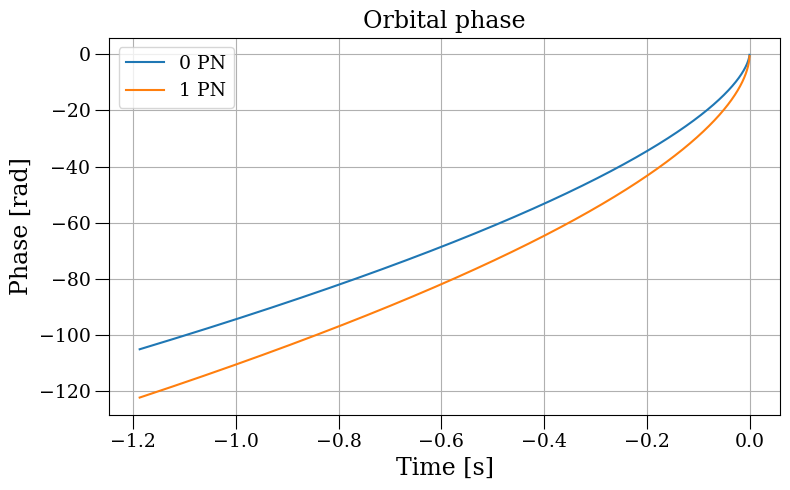

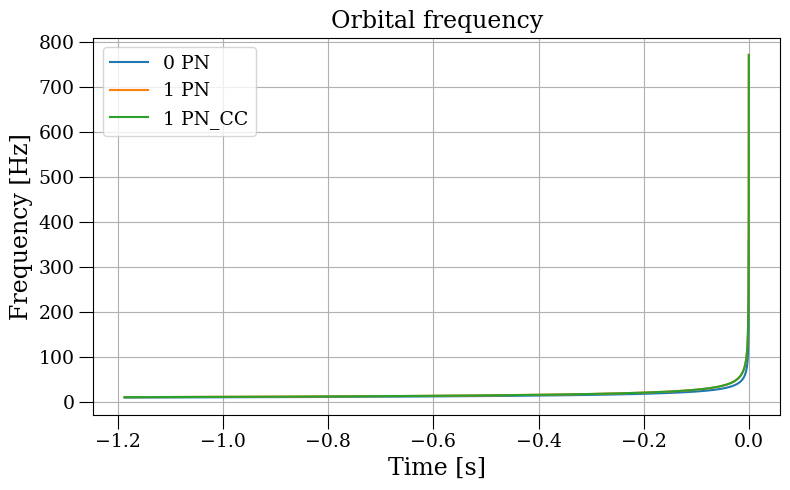

In [ ]:
# Plot
plt.figure()
plt.plot(t-t[-1], P_0pn, label=str(0)+" PN")
plt.plot(t-t[-1], P_1pn, label=str(1)+" PN")
plt.title("Orbital phase")
plt.xlabel('Time [s]')
plt.ylabel('Phase [rad]')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


plt.figure()
plt.plot(t-t[-1], F_0pn, label=str(0)+" PN")
plt.plot(t-t[-1], F_1pn, label=str(1)+" PN")
plt.plot(t-t[-1], F_1pn_CC, label=str(1)+" PN_CC")
plt.title("Orbital frequency")
plt.xlabel('Time [s]')
plt.ylabel('Frequency [Hz]')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()


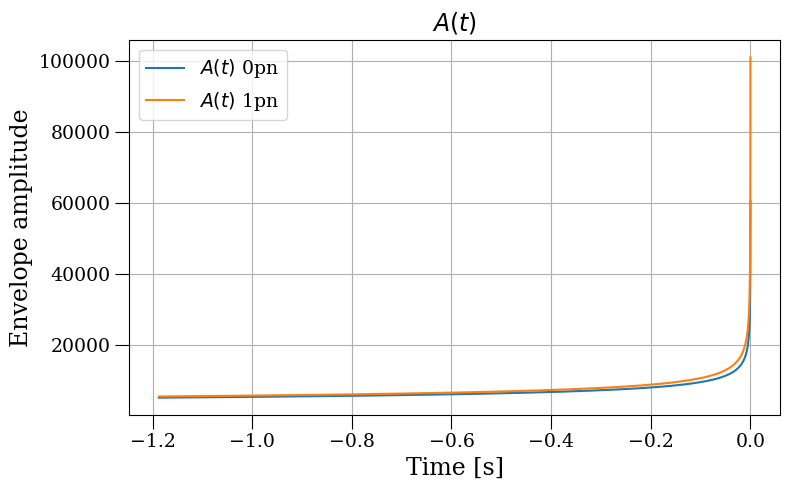

In [ ]:
# Compute GW phase and frequency
phit              = 2*P_0pn - phi_0
ft_0pn            = 2*F_0pn
ft_1pn            = 2*F_1pn

# Compute A(t)
#At_0pn            = 4 * np.power(G*Mchirp/c2,5/3) * np.power(np.pi*ft_0pn/c,2/3)
#At_1pn            = 4 * np.power(G*Mchirp/c2,5/3) * np.power(np.pi*ft_1pn/c,2/3)

At_0pn_CC          = 2 * G* mu/c4 * np.power(2 * G * Mtotal * np.pi*ft_0pn, 2/3)
At_1pn_CC          = 2 * G* mu/c4 * np.power(2 * G * Mtotal * np.pi*ft_1pn, 2/3)

# Plot
plt.figure()
plt.plot(t-t[-1], At_0pn_CC, label="$A(t)$ 0pn")
plt.plot(t-t[-1], At_1pn_CC, label="$A(t)$ 1pn")
plt.title("$A(t)$")
plt.xlabel('Time [s]')
plt.ylabel('Envelope amplitude')
plt.grid()
plt.legend()
plt.tight_layout()
plt.show()

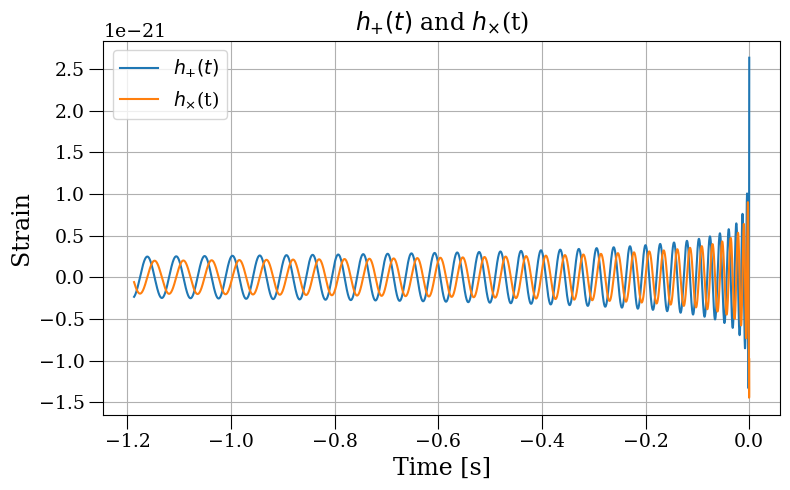

In [ ]:
# Compute GW: hp and hc polarizations
hp            = (1/D) * At_0pn_CC * (1+np.cos(iota)**2)/2  * np.cos(phit)
hc            = (1/D) * At_0pn_CC * np.cos(iota)           * np.sin(phit)

# Plot
plt.figure()
plt.plot(t-t[-1], hp, label=r"$h_{+}(t)$")
plt.plot(t-t[-1], hc, label=r"$h_{\times}$(t)")
plt.title(r"$h_{+}(t)$ and $h_{\times}$(t)")
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.grid()
#plt.xlim(-0.1,0.001)
plt.legend()
plt.tight_layout()
plt.show()

ValueError: ignored

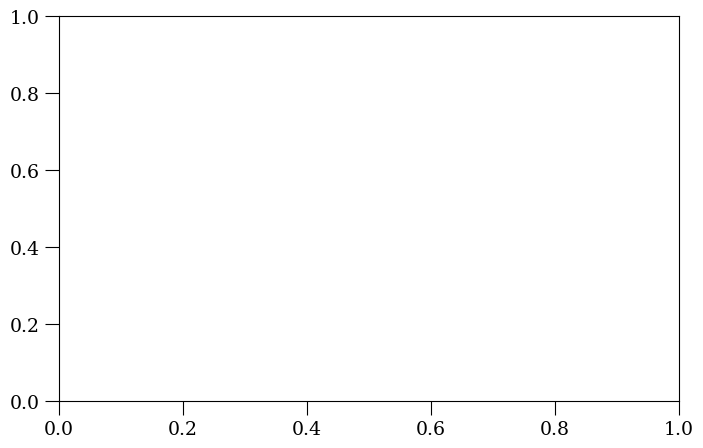

In [ ]:
# Compute GW: hp and hc polarizations with Cosmological Constant
hp            = (1/D) * At_0pn_CC * (1+np.cos(iota)**2)/2  * np.cos(phit)
hc            = (1/D) * At_0pn_CC * np.cos(iota)           * np.sin(phit)

omega         = 1
phi           = 1

hp_CC         = (CC*c2/omega**2)*(-np.sin(iota)**2/12+ \
                5*(1+np.cos(iota)**2)*np.cos(2*phi)/36) - \
                (m1-m2)*np.power(G*Mtotal * omega,1/3) * np.sin(iota)/(8*c)* \
                ((5+np.cos(iota)**2)*np.cos(phi)-9*(1+np.cos(iota)**2)*np.cos(3*phi)-
                (CC*c2)/(3*omega**2)*((5+np.cos(iota)**2)*np.cos(phi) - \
                9*(1+np.cos(iota)**2)*np.cos(3*phi))+
                np.power(G*Mtotal * omega,2/3)/c2*((3-nu)*np.sin(iota)**2/2 +
                np.cos(2*phi)*((19+9*np.cos(iota)**2-2*np.power(np.cos(iota),4))- \
                nu*(19-11*np.cos(iota)**2-6*np.power(np.cos(iota),4))/6- \
                4*np.sin(iota)**2*(1+np.cos(iota)**2)*(1-3*nu)*np.cos(4*phi)/3) +
                CC*np.power(G*Mtotal * omega,2/3)/(omega**2)* \
                (13/24-9*np.cos(iota)**2/16+np.power(np.cos(iota),4)/48+275*nu*np.sin(iota)**2/72)+ \
                np.cos(2*phi)*(-371/432-35*np.cos(iota)**2/144+35*np.power(np.cos(iota),4)/108+ \
                + nu*(331/144+65*np.cos(iota)**2/144+35*np.power(np.cos(iota),4)/36)) + \
                np.cos(4*phi)*(5/18+11*np.cos(iota)**2/54-13*np.power(np.cos(iota),4)/27) + \
                nu*(-5/6-69*np.cos(iota)**2/72+13*np.power(np.cos(iota),4)/9)))
hc_CC         = (CC*c2)/(9*np.power(omega,2))*np.sin(2*phi)*np.cos(iota)+ \
                (3*(-m1+m2)*np.sin(2*iota)*np.power(G*Mtotal * omega,1/3))/(8*c)* \
                ((1+(2*CC*c2)/(9*omega**2))*np.sin(phi) - \
                (3-(20*CC*c2)/(9*(omega)**2))*np.sin(3*phi) + \
                np.cos(iota)*np.power(G*Mtotal * omega,2/3)/c2* \
                (((17/3-4*np.cos(iota)**2/3)+nu*(-13/3+4*np.cos(iota)**2))*np.sin(2*phi) \
                -8*(1-3*nu)*np.sin(iota)**2*np.sin(4*phi)/3 +
                (CC*c2)/(omega)**2*((-92/27+np.cos(iota)**2/3)+nu*(79/18-13*np.cos(iota)**2/6))
                *np.sin(2*phi)+ (CC*c2)/(omega)**2*((359/216-359*nu/72)* \
                 np.sin(iota)**2)*np.sin(4*phi)))


# Plot
plt.figure()
plt.plot(t-t[-1], hp_CC, label=r"$h_{+}(t)$")
#plt.plot(t-t[-1], hc, label=r"$h_{\times}$(t)")
plt.title(r"$h_{+}(t)$ and $h_{\times}$(t)")
plt.xlabel('Time [s]')
plt.ylabel('Strain')
plt.grid()
#plt.xlim(-0.1,0.001)
plt.legend()
plt.tight_layout()
plt.show()

# Compute $h_{+}(t)$

$h_{+} = \frac{2G\mu}{c^4 R}(Gm\omega)^{2/3}\bigg \lbrace -(1+\mathrm{cos}^2\iota)\mathrm{cos}2\phi+\frac{\Lambda c^2}{\omega^2}\left(  -\frac{1}{12}\mathrm{sin}^2 \iota+\frac{5}{36}(1+\mathrm{cos}^2\iota)\mathrm{cos}2\phi \right) \\
        +\frac{\Delta m}{c}\left( -\frac{1}{8}(Gm\omega)^{1/3}\mathrm{sin}\iota \right)\bigg[ (5+\mathrm{cos}^2 \iota)\mathrm{cos}\phi-9(1+\mathrm{cos}^2\iota)\mathrm{cos}3\phi-\frac{\Lambda c^2}{3\omega^2}[(5+\mathrm{cos}^2\iota)\mathrm{cos}\phi-9(1+\mathrm{cos}^2\iota)\mathrm{cos}3\phi] \bigg]  \\
        +\frac{1}{c^2}(Gm\omega)^{2/3}\bigg[ \frac{1}{2}(3-\nu)\mathrm{sin}^2\iota+\frac{1}{6}\lbrace [19+9\mathrm{cos}^2\iota-2\mathrm{cos}^4\iota]-\nu[19-11\mathrm{cos}^2\iota-6\mathrm{cos}^4\iota] \rbrace \mathrm{cos}2\phi   \\
        -\frac{4}{3}\mathrm{sin}^2\iota(1+\mathrm{cos}^2\iota)(1-3\nu)\mathrm{cos}4\phi \bigg]  \\
        +\frac{\Lambda}{\omega^2}(Gm\omega)^{2/3} \left\lbrace \frac{13}{24}-\frac{9}{16}\mathrm{cos}^2\iota+\frac{1}{48}\mathrm{cos}^4\iota+\frac{275}{72}\nu \mathrm{sin}^2\iota+\mathrm{cos}2\phi \bigg[ -\frac{371}{432}-\frac{35}{144}\mathrm{cos}^2\iota -\frac{35}{108}\mathrm{cos}^4\iota \right.  \\
        + \nu\bigg( \frac{331}{144}+\frac{65}{144}\mathrm{cos}^2\iota+\frac{35}{36}\mathrm{cos}^4\iota \bigg) \bigg]  \\
        + \left. \mathrm{cos}4\phi\bigg[ \frac{5}{18}+\frac{11}{54}\mathrm{cos}^2\iota-\frac{13}{27}\mathrm{cos}^4\iota+\nu \bigg( -\frac{5}{6}-\frac{69}{72}\mathrm{cos}^2\iota+\frac{13}{9}\mathrm{cos}^4\iota \bigg) \bigg] \right\rbrace   \bigg\rbrace$


In [ ]:
# -------------------------------
# Compute hp
#hp            = (1/D) * At * (1+np.cos(iota)**2)/2  * np.cos(phit)


# Compute $h_{\times}(t)$

$h_{\times}=\frac{2G\mu}{c^4 R} (Gm\omega)^{2/3} \bigg\lbrace -2\mathrm{cos}\iota \mathrm{sin}2\phi +\frac{\Lambda c^2}{9\omega^2}\mathrm{cos}\iota \mathrm{sin}2\phi \\
        +\frac{\Delta m}{c}\bigg( -\frac{3}{8}(Gm\omega)^{1/3}\mathrm{sin}2\iota \bigg)\bigg[ \bigg( 1+\frac{2}{9}\frac{\Lambda c^2}{\omega^2} \bigg)\mathrm{sin}\phi -\bigg( 3-\frac{20}{9}\frac{\Lambda c^2}{\omega^2}
 \bigg)\mathrm{sin}3\phi \bigg] \\
 +\frac{1}{c^2}(Gm\omega)^{2/3}\mathrm{cos}\iota \bigg[ \left \lbrace  \bigg( \frac{17}{3}-\frac{4}{3}\mathrm{cos}^2\iota \bigg)+\nu \bigg( -\frac{13}{3}+4\mathrm{cos}^2\iota \bigg)  \right \rbrace \mathrm{sin}2\phi -\frac{8}{3}(1-3\nu)\mathrm{sin}^2\iota \mathrm{sin}4\phi \\
 +\frac{\Lambda c^2}{\omega^2} \left \lbrace  \bigg( -\frac{92}{27}+\frac{1}{3}\mathrm{cos}^2\iota \bigg)+\nu \bigg( \frac{79}{18}-\frac{13}{6}\mathrm{cos}^2\iota
 \bigg)  \right \rbrace \mathrm{sin}2\phi +\frac{\Lambda c^2}{\omega^2} \left \lbrace  \bigg( \frac{359}{216}-\frac{359}{72}\nu \bigg)\mathrm{sin}^2\iota  \right \rbrace \mathrm{sin}4\phi \bigg] \bigg \rbrace $

In [ ]:
# -------------------------------
# Compute hc
#hc            = (1/D) * At * np.cos(iota)           * np.sin(phit)